In [43]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

## Time

In [44]:
time = pd.read_csv('data_2/time.csv',sep=',')
del time['Unnamed: 8']
time

,3,10,100,500,1000,3000,5000,10000
0,1,3,197,6382,26052,232010,641170,2560642
1,1,3,197,6133,26074,231678,644554,2550676
2,1,3,266,6760,26609,231464,711130,2547071
3,1,3,249,6128,26052,231925,640402,2548438
4,1,2,202,6213,26103,232081,639428,2546129
5,1,3,267,7008,26174,256520,644136,2585294
6,1,3,263,7059,26043,249690,641400,2547442
7,0,2,197,6236,26096,231577,639890,2542409
8,0,2,198,6356,26006,230922,636607,2546022
9,1,2,196,6261,26156,231930,639551,3308303


In [45]:
timeData=[]
for j in time.axes[1]:
    tmp=0
    for i in range(0,10):
        tmp=tmp+time.get_value(i,j)
    timeData.append(tmp/10.)

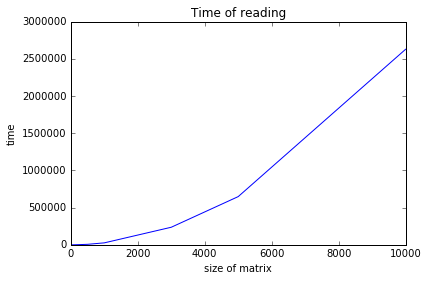

In [46]:
x = [3,10,100,500,1000,3000,5000,10000]
plt.plot(x,timeData)
plt.xlabel("size of matrix")
plt.ylabel("time")
plt.title('Time of reading')
plt.draw()
plt.savefig('Graphs/time_of_reading', dpi=200)

## Data

Threads

In [47]:
data1 = pd.read_csv('data_1/data1.csv',sep=',')
del data1['Unnamed: 10']
for i in ['1','2','3','4','5','6','7','8','9','10']:
    dataTmp = pd.read_csv('data_1/data'+i+'.csv',sep=',')
    del dataTmp['Unnamed: 10']
    data = data + dataTmp
data1 = data1 / 10
data1

,seq,1,2,3,4,6,8,16,24,32
3,0.1,13.8,18.7,25.0,27.9,45.1,44.2,84.3,111.3,153.3
10,0.2,10.6,15.8,19.5,24.7,41.5,48.5,91.2,117.6,159.9
100,4.0,19.2,18.8,26.4,30.3,48.5,61.5,87.0,133.7,174.6
500,101.8,143.1,80.8,66.5,67.7,75.9,106.8,90.1,132.3,165.0
1000,423.7,517.3,284.0,201.2,161.9,167.2,161.1,255.0,196.9,234.0
3000,3818.3,4546.0,2417.3,1839.8,1775.7,1296.7,1170.9,1205.4,1188.9,1171.2
5000,10437.3,12554.0,10112.6,4511.0,3769.3,3273.7,3181.7,3209.2,3269.1,3359.3
10000,41787.9,50114.8,24970.8,17974.1,13935.2,13004.4,12772.9,12680.3,12675.9,12739.7


In [48]:
x = [1,2,3,4,6,8,16,24,32]
del data1['seq']
matrix1 = data1.as_matrix()

OpenMP

In [49]:
data2 = pd.read_csv('data_2/data1.csv',sep=',')
del data2['Unnamed: 10']
for i in ['1','2','3','4','5','6','7','8','9','10']:
    dataTmp = pd.read_csv('data_2/data'+i+'.csv',sep=',')
    del dataTmp['Unnamed: 10']
    data = data + dataTmp
data2 = data2 / 10
data2

,seq,1,2,3,4,6,8,16,24,32
3,0.2,0.8,6.3,6.8,9.3,11.5,13.6,41.6,62.7,78.9
10,0.2,0.6,4.8,6.7,9.5,12.3,16.1,44.3,62.4,80.4
100,4.0,5.5,7.5,9.8,19.0,19.0,20.9,46.1,68.8,87.2
500,103.1,122.2,76.7,54.8,51.0,53.1,71.6,122.0,131.2,143.5
1000,428.5,526.1,276.4,198.2,188.1,161.5,188.8,320.7,206.1,313.9
3000,3818.3,4645.2,2442.7,1660.0,1244.9,1497.0,1131.7,1582.2,1570.4,1287.5
5000,10466.8,12860.8,6781.4,4567.2,3447.3,4162.8,3147.3,3479.8,3407.6,3396.8
10000,41847.2,51363.2,27099.9,18189.7,13778.9,12961.9,12565.0,12875.3,12939.3,12866.9


In [50]:
x = [1,2,3,4,6,8,16,24,32]
del data2['seq']
matrix2 = data2.as_matrix()

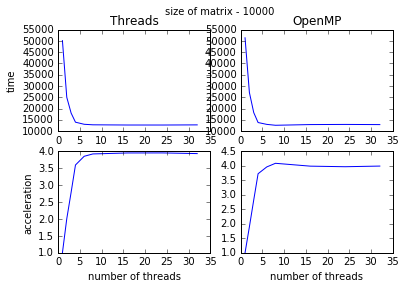

In [51]:
for i in range(0,8):
    plt.clf()
    plt.subplot(2,2,1)
    plt.plot(x,matrix1[i])
    plt.title('Threads')
    #plt.xlabel("number of threads")
    plt.ylabel("time")
    plt.subplot(2,2,3)
    plt.plot(x,matrix1[i][0]/matrix1[i])
    #plt.title("size of matrix - "+time.axes[1][i])
    plt.xlabel("number of threads")
    plt.ylabel("acceleration")
    plt.subplot(2,2,2)
    plt.plot(x,matrix2[i])
    plt.title('OpenMP')
    #plt.xlabel("number of threads")
    #plt.ylabel("time")
    plt.subplot(2,2,4)
    plt.plot(x,matrix2[i][0]/matrix2[i])
    #plt.title("size of matrix - "+time.axes[1][i])
    plt.xlabel("number of threads")
    #plt.ylabel("acceleration")
    plt.suptitle("size of matrix - "+time.axes[1][i])
    plt.draw()
    plt.savefig('Graphs/size='+time.axes[1][i]+'.png', dpi=200)

In [54]:
matrix=matrix.T

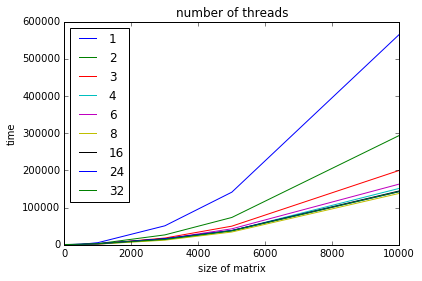

In [55]:
labels = ['1','2','3','4','6','8','16','24','32']
x = [3,10,100,500,1000,3000,5000,10000]
for i in range(0,9):
    plt.plot(x,matrix[i],label=labels[i])
    plt.title("number of threads")
    plt.xlabel("size of matrix")
    plt.ylabel("time")
    plt.legend(loc="upper left")
plt.draw()
plt.savefig('Graphs/threads', dpi=200)